Pritesh Patil

#### Problem 1

![problem1.png](problem1.png)

Given:\

Focal length, $f = 10 cm$\

Distance of object from the lens, $P = 30 cm$

To find:\

Distance of image from lens, $q$\

Magnification of the image, $M$

Solution:

For the distance of image from lens, $q$\

\begin{equation}
\frac{1}{p} + \frac{1}{q} = \frac{1}{f}\\
\end{equation}
$$\frac{1}{30} + \frac{1}{q} = \frac{1}{10}\\$$
$$q = 15 cm$$

For the magnification of the image, $M$\

\begin{equation}
M = \frac{-q}{P}
\end{equation}
$$
M = \frac{-15}{30}\\
M = -0.5
$$

Answer: So the image is a distance of 15 cm from the lens and has a magnification of -0.5.

#### Problem 2

A camera suitable for an autonomous vehicle is the Sekonix SF3324-10X camera which was developed by Sekonix in partnership with NVIDIA DRIVE for commericial use. The lens that can be paired with this camera is the NA1262 which provides a 120&deg; FOV (Field-of-View). Here are the technical specifications of the camera:

Sensor: Onsemi AR-0321 CMOS sensor\

Resolution (in pixels): 1928 x 1208 (2.3MP)\

Refresh rate (frames per second): 30 fps\

f-number: f/2.7\

Shutter type: Rolling shutter\

Lens: NA1262 - FOV 120 Lens\

Waterproof - IP69K\

Connector: MAXIM MAX96705 and FAKRA Z Type\

According to the manufacturer [1], the Onsemi AR-0321 is a CMOS sensor that includes LED Flicker Mitigation (LFM) that eliminates LED flicker from traffic signs and vehicle LED lighting and allows Traffic Sign Reading algorithms to operate in all light conditions. This sensor is also developed specifically for ADAS + Viewing Fusion applications in autnonomous vehicles. The camera itself is also water/weather-proof. This paired with the high 120&deg; FOV would provide the necessary data for lane line, traffic sign detection, etc.

#### Problem 3

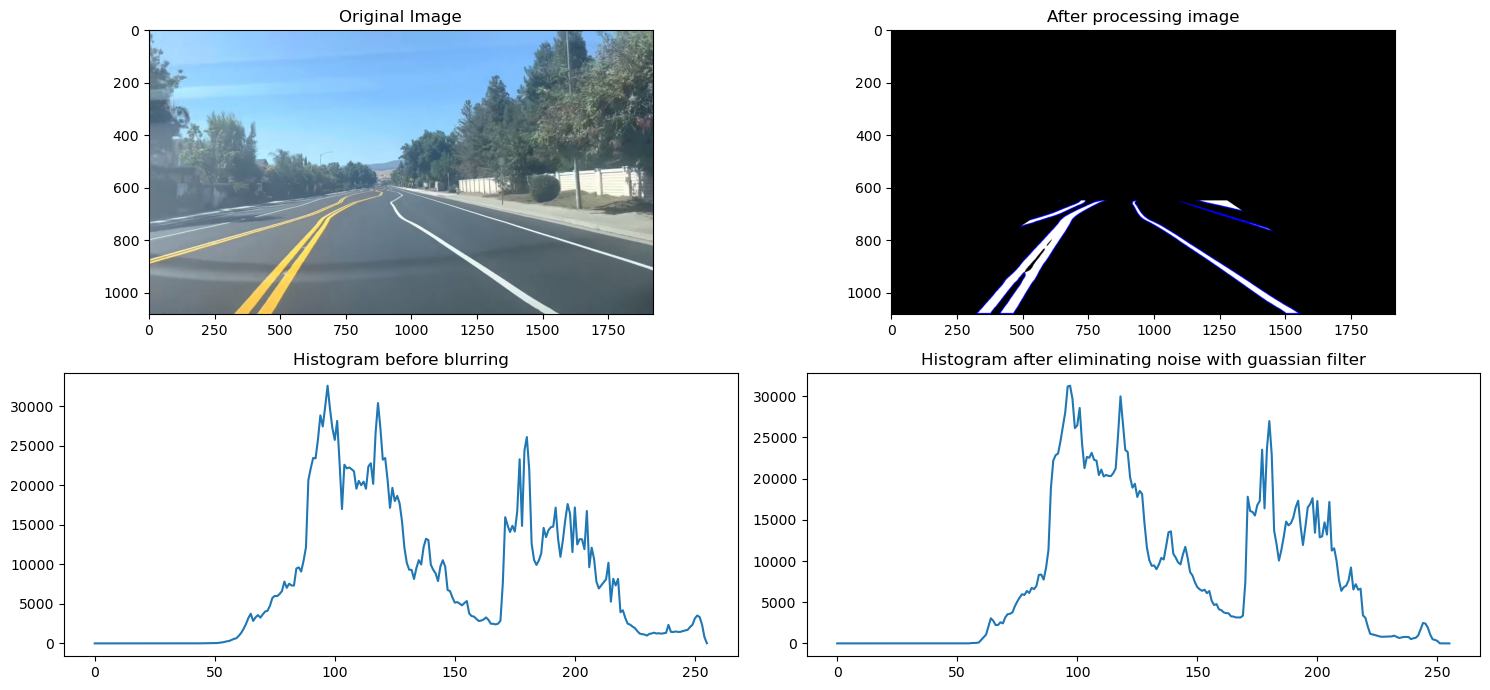

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Reading the image:
img = cv2.imread('Lane Lines - Medium Difficulty Image 1.jpg')

# Converting from BGR color space to RGB color space:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Getting the dimensions of the image:
(h, w, c) = img.shape

# Convert the image to grayscale:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Calculate the histogram
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Blurs the image using a Gaussian filter to eliminate noise:
gray_image_blurred = cv2.GaussianBlur(gray_image, (25, 25), 0)

# Calculate the histogram
hist2 = cv2.calcHist([gray_image_blurred], [0], None, [256], [0, 256])

# Otsu's binarization algorithm:
ret, th = cv2.threshold(gray_image_blurred, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Applying Otsu's binarization to the image
gray_image_blurred = cv2.cvtColor(th, cv2.COLOR_GRAY2RGB)

# Defining contour detection:
def draw_contour_outline(img, cnts, color, thickness=1):

    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)

# Find contours using the thresholded image:
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Copy image to show the results:
image_contours = gray_image_blurred.copy()

# Draw the outline of all detected contours:
draw_contour_outline(image_contours, contours, (0, 0, 255), 5)

# Creating a mask to exclude everything except the region of interest
mask = np.zeros(image_contours.shape[:2], dtype="uint8")
cv2.fillPoly(mask, np.array( \
   [[(int(w/3), int(h*6/10)), (0, h), (w, h), (int(w*2/3), int(h*6/10))]]), (255, 255, 255))
masked = cv2.bitwise_and(image_contours, gray_image_blurred, mask=mask)

# Plotting before and after image for pipeline
plt.subplots(figsize=(15,7))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(2, 2, 2)
plt.imshow(masked)
plt.title("After processing image")
plt.subplot(2, 2, 3)
plt.plot(hist)
plt.title('Histogram before blurring')
plt.subplot(2, 2, 4)
plt.plot(hist2)
plt.title('Histogram after eliminating noise with guassian filter')
plt.tight_layout()
plt.show()

#### Problem 4

In [ ]:
import cv2

def process(img):
    import numpy as np
    import matplotlib.pyplot as plt

    # # Converting from BGR color space to RGB color space
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Getting the dimensions of the image
    (h, w, c) = img.shape

    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #  Blurs the image using a Gaussian filter to eliminate noise
    gray_image_blurred = cv2.GaussianBlur(gray_image, (25, 25), 0)

    # Otsu's binarization algorithm:
    ret, th = cv2.threshold(gray_image_blurred, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    gray_image_blurred = cv2.cvtColor(th, cv2.COLOR_GRAY2RGB)

    # Defining contour detection
    def draw_contour_outline(img, cnts, color, thickness=1):

        for cnt in cnts:
            cv2.drawContours(img, [cnt], 0, color, thickness)

    # Find contours using the thresholded image:
    # Note: cv2.findContours() has been changed to return only the contours and the hierarchy
    contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours2, hierarchy2 = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # Copy image to show the results:
    image_contours = gray_image_blurred.copy()
    image_contours_2 = gray_image_blurred.copy()

    # Draw the outline of all detected contours:
    draw_contour_outline(image_contours, contours, (0, 0, 255), 3)
    draw_contour_outline(image_contours_2, contours2, (255, 0, 0), 3)

    # Creating a mask to exclude everything except the region of interest
    mask = np.zeros(image_contours.shape[:2], dtype="uint8")
    cv2.fillPoly(mask, np.array( \
    [[(int(w/3), int(h*6/10)), (0, h), (w, h), (int(w*1/2), int(h*6/10))]]), (255, 255, 255))
    masked = cv2.bitwise_and(image_contours, gray_image_blurred, mask=mask)

    return masked

# Create a VideoCapture object. In this case, the argument is the video file name:
capture = cv2.VideoCapture("Lane Lines - Medium Difficulty - High Res.mp4")

# Read until video is completed, or 'q' is pressed
while capture.isOpened():
    # Capture frame-by-frame from the video file
    ret, frame = capture.read()
    
    if ret is True :
        # Display the resulting frame
        frame = process(frame)
        cv2.imshow('Frame',frame)
        # Press q on keyboard to exit the program
        if cv2.waitKey(1) &0xFF == ord('q'):
            break
    # Break the loop
    else :
        break

# Release everything
capture.release()
cv2.destroyAllWindows()

#### Problem 5

Gupta *et al* [2] propose a real-time lane detection solution which works on continuous, non-continuous, straight, and curved lanes. This is done by extracting the foreground image and applying a Spatio-Temporal Incremental Clustering (STIC) algorithm coupled with curve-fitting. They suggest the use of an image processing pipeline of Region of Interest (ROI) Selection, Image Gray-Scaling and Smoothing, Foreground Detection and Segmentation, Connected Componenet Detection, and STIC for accurate and robust lane detection. Their framework is also limited to the type of road surface data present in the training data used during the research.

#### References:

[1] “SEKONIX | Camera.” n.d. Accessed January 24, 2023. http://sekolab.com/products/camera/.

[2] A. Gupta and A. Choudhary, "A Framework for Camera-Based Real-Time Lane and Road Surface Marking Detection and Recognition," in IEEE Transactions on Intelligent Vehicles, vol. 3, no. 4, pp. 476-485, Dec. 2018, doi: 10.1109/TIV.2018.2873902.